<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-단독다가구-EDA" data-toc-modified-id="1.-단독다가구-EDA-1">1. 단독다가구 EDA</a></span><ul class="toc-item"><li><span><a href="#1.1-시군구별-EDA" data-toc-modified-id="1.1-시군구별-EDA-1.1">1.1 시군구별 EDA</a></span><ul class="toc-item"><li><span><a href="#1.1.1-시군구별-전월세" data-toc-modified-id="1.1.1-시군구별-전월세-1.1.1">1.1.1 시군구별 전월세</a></span></li><li><span><a href="#1.1.2-시군구별-전세-보증금" data-toc-modified-id="1.1.2-시군구별-전세-보증금-1.1.2">1.1.2 시군구별 전세 보증금</a></span></li><li><span><a href="#1.1.3-시군구별-월세-보증금,-월세" data-toc-modified-id="1.1.3-시군구별-월세-보증금,-월세-1.1.3">1.1.3 시군구별 월세 보증금, 월세</a></span></li></ul></li></ul></li></ul></div>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings(action='ignore')

In [13]:
data = pd.read_csv('data/단독다가구(전월세).csv')
data.head()

,시군구,번지,도로조건,계약면적(㎡),전월세구분,계약년월,계약일,보증금(만원),월세(만원),건축년도,도로명
0,서울특별시 강남구 개포동,1***,-,10.0,전세,201501,16,"9,500",0,1989.0,NaN
1,서울특별시 강남구 개포동,1***,-,15.0,월세,201504,4,200,35,1988.0,논현로6길
2,서울특별시 강남구 개포동,1***,-,15.0,월세,201506,9,500,30,1998.0,논현로18길
3,서울특별시 강남구 개포동,1***,-,15.0,월세,201507,27,500,40,1998.0,개포로20길
4,서울특별시 강남구 개포동,1**,8m미만,15.0,전세,201509,22,"3,000",0,1987.0,선릉로12길


# 1. 단독다가구 EDA

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762504 entries, 0 to 762503
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   시군구      762504 non-null  object 
 1   번지       762421 non-null  object 
 2   도로조건     762448 non-null  object 
 3   계약면적(㎡)  762504 non-null  float64
 4   전월세구분    762504 non-null  object 
 5   계약년월     762504 non-null  int64  
 6   계약일      762504 non-null  int64  
 7   보증금(만원)  762504 non-null  object 
 8   월세(만원)   762504 non-null  object 
 9   건축년도     726086 non-null  float64
 10  도로명      688663 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 64.0+ MB


In [16]:
data = data.dropna(subset=['도로명']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688663 entries, 0 to 688662
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   시군구      688663 non-null  object 
 1   번지       688663 non-null  object 
 2   도로조건     688607 non-null  object 
 3   계약면적(㎡)  688663 non-null  float64
 4   전월세구분    688663 non-null  object 
 5   계약년월     688663 non-null  int64  
 6   계약일      688663 non-null  int64  
 7   보증금(만원)  688663 non-null  object 
 8   월세(만원)   688663 non-null  object 
 9   건축년도     657947 non-null  float64
 10  도로명      688663 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 57.8+ MB


## 1.1 시군구별 EDA

In [18]:
print(len(data['시군구'].unique()))
data['시군구'].unique()

388


array(['서울특별시 강남구 개포동', '서울특별시 강남구 논현동', '서울특별시 강남구 대치동', '서울특별시 강남구 도곡동',
       '서울특별시 강남구 삼성동', '서울특별시 강남구 세곡동', '서울특별시 강남구 수서동', '서울특별시 강남구 신사동',
       '서울특별시 강남구 역삼동', '서울특별시 강남구 율현동', '서울특별시 강남구 일원동', '서울특별시 강남구 자곡동',
       '서울특별시 강남구 청담동', '서울특별시 강동구 고덕동', '서울특별시 강동구 길동', '서울특별시 강동구 둔촌동',
       '서울특별시 강동구 명일동', '서울특별시 강동구 상일동', '서울특별시 강동구 성내동', '서울특별시 강동구 암사동',
       '서울특별시 강동구 천호동', '서울특별시 강북구 미아동', '서울특별시 강북구 번동', '서울특별시 강북구 수유동',
       '서울특별시 강북구 우이동', '서울특별시 강서구 가양동', '서울특별시 강서구 개화동', '서울특별시 강서구 공항동',
       '서울특별시 강서구 내발산동', '서울특별시 강서구 등촌동', '서울특별시 강서구 마곡동',
       '서울특별시 강서구 방화동', '서울특별시 강서구 염창동', '서울특별시 강서구 외발산동',
       '서울특별시 강서구 화곡동', '서울특별시 관악구 남현동', '서울특별시 관악구 봉천동', '서울특별시 관악구 신림동',
       '서울특별시 광진구 광장동', '서울특별시 광진구 구의동', '서울특별시 광진구 군자동', '서울특별시 광진구 능동',
       '서울특별시 광진구 자양동', '서울특별시 광진구 중곡동', '서울특별시 광진구 화양동',
       '서울특별시 구로구 가리봉동', '서울특별시 구로구 개봉동', '서울특별시 구로구 고척동',
       '서울특별시 구로구 구로동', '서울특별시 구로구 궁동', '서울특별시 구로구 신도림동', '서울특별시 구로구 오류동',
       '서울특별시 구로구 

### 1.1.1 시군구별 전월세

In [29]:
전세_data = data[data['전월세구분']=='전세']
전세_data.head()

,시군구,번지,도로조건,계약면적(㎡),전월세구분,계약년월,계약일,보증금(만원),월세(만원),건축년도,도로명
3,서울특별시 강남구 개포동,1**,8m미만,15.00,전세,201509,22,"3,000",0,1987.0,선릉로12길
4,서울특별시 강남구 개포동,1**,8m미만,15.00,전세,201511,25,"3,000",0,1987.0,선릉로12길
16,서울특별시 강남구 개포동,1***,-,20.00,전세,201503,30,"8,000",0,2000.0,논현로6길
17,서울특별시 강남구 개포동,1***,-,20.14,전세,201501,20,"6,000",0,NaN,논현로
18,서울특별시 강남구 개포동,1***,-,21.00,전세,201504,3,"7,000",0,1992.0,논현로8길


In [51]:
시군구_전세 = 전세_data.groupby(['시군구'])['전월세구분'].count().to_frame()
시군구_전세 = 시군구_전세.rename(columns={'전월세구분':'전세'}).sort_values(by='전세', ascending=False).head(20)
시군구_전세

,전세
시군구,
서울특별시 관악구 신림동,15698
서울특별시 관악구 봉천동,12764
서울특별시 중랑구 면목동,8791
서울특별시 광진구 중곡동,7869
서울특별시 동작구 사당동,6478
서울특별시 영등포구 신길동,6467
서울특별시 동작구 상도동,6016
서울특별시 강북구 미아동,5824
서울특별시 광진구 자양동,5363


In [53]:
월세_data = data[data['전월세구분']=='월세']
월세_data.head()

,시군구,번지,도로조건,계약면적(㎡),전월세구분,계약년월,계약일,보증금(만원),월세(만원),건축년도,도로명
0,서울특별시 강남구 개포동,1***,-,15.00,월세,201504,4,200,35,1988.0,논현로6길
1,서울특별시 강남구 개포동,1***,-,15.00,월세,201506,9,500,30,1998.0,논현로18길
2,서울특별시 강남구 개포동,1***,-,15.00,월세,201507,27,500,40,1998.0,개포로20길
5,서울특별시 강남구 개포동,1***,8m미만,16.50,월세,201511,24,500,25,NaN,논현로8길
6,서울특별시 강남구 개포동,1**,8m미만,16.52,월세,201508,10,500,40,NaN,선릉로14길


In [54]:
시군구_월세 = 월세_data.groupby(['시군구'])['전월세구분'].count().to_frame()
시군구_월세 = 시군구_월세.rename(columns={'전월세구분':'월세'}).sort_values(by='월세', ascending=False).head(20)
시군구_월세

,월세
시군구,
서울특별시 관악구 신림동,21303
서울특별시 관악구 봉천동,18269
서울특별시 중랑구 면목동,9369
서울특별시 동작구 사당동,8447
서울특별시 영등포구 신길동,8440
서울특별시 광진구 중곡동,7753
서울특별시 금천구 독산동,7709
서울특별시 광진구 자양동,7640
서울특별시 동작구 상도동,6451


- 단독다가구의 전세는 신림동, 봉천동, 면목동, 중곡동, 사당동, 신길동, 상도동, 미아동, 자양동, 독산동, 화곡동, 수유동, 시흥동, 구의동, 천호동, 성내동, 대림동, 구로동, 중화동, 방배동 순으로 많이 분포해 있음.


- 단독다가구의 월세는 신림동, 봉천동, 면목동, 사당동, 신길동, 중곡동, 독산동, 자양동, 상도동, 화곡동, 미아동, 구의동, 천호동, 구로동, 수유동, 시흥동, 성내동, 대림동, 중화동, 방배동 순으로 많이 분포해 있음.


- 시군구가 너무 많아서 위도, 경도를 붙인 이후에 지도상으로 표현해봐야 할 것 같음.

### 1.1.2 시군구별 전세 보증금

- 전세_data의 '월세(만원)' 컬럼 값은 모두 0이지만.. 타입이 숫자형인 것도 있고 문자형인 것도 있음.. 뭐지

In [69]:
전세_data['보증금(만원)'] = 전세_data['보증금(만원)'].apply(lambda x : x.replace(',', ''))

In [70]:
전세_data['보증금(만원)'] = 전세_data['보증금(만원)'].astype(float)

In [71]:
전세_data['보증금(만원)'].describe()

count    306189.000000
mean      11087.596808
std        6922.563697
min           0.000000
25%        6000.000000
50%       10000.000000
75%       15000.000000
max      163000.000000
Name: 보증금(만원), dtype: float64

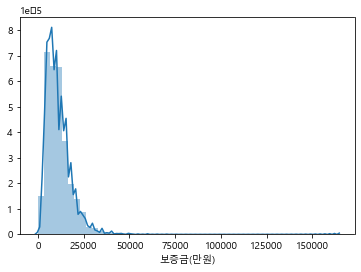

In [72]:
sns.distplot(전세_data['보증금(만원)'])

In [77]:
시군구_전세2 = 전세_data.groupby(['시군구'])['보증금(만원)'].mean().to_frame()
시군구_전세2 = 시군구_전세2.sort_values(by='보증금(만원)', ascending=False).head(20)
시군구_전세2

,보증금(만원)
시군구,
서울특별시 강남구 수서동,36542.857143
서울특별시 서초구 내곡동,34157.534247
서울특별시 서초구 염곡동,30635.185185
서울특별시 강남구 자곡동,30630.000000
서울특별시 강남구 율현동,30330.991736
서울특별시 종로구 사간동,30090.909091
서울특별시 서초구 신원동,29850.000000
서울특별시 강남구 세곡동,29579.958678
서울특별시 종로구 소격동,28333.333333
